#  Laboratorio 3

##### Gladys Andrea Rodríguez Guerrero  -  20006107

### Librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Carga de Dataset

In [2]:
data = pd.read_csv('train.csv')

print(str(data.shape) + '\n')

data.head()

(891, 12)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# eliminando columna ID

data.drop('PassengerId', axis=1, inplace=True)

print(str(data.shape))

(891, 11)


### Análisis de Datos (toma de decisiones)

##### 2.1 Análisis del Taget

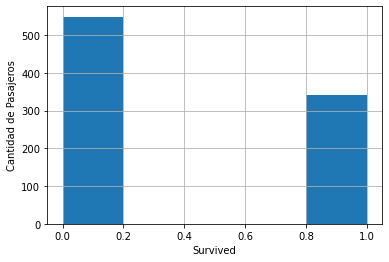

In [4]:
data['Survived'].hist(bins=5, density=False)
plt.xlabel("Survived")
plt.ylabel("Cantidad de Pasajeros")
plt.show()

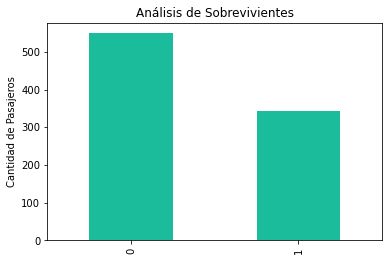

In [5]:
data['Survived'].value_counts().plot(kind='bar', color = '#1ABC9C')
plt.ylabel("Cantidad de Pasajeros")
plt.title('Análisis de Sobrevivientes')
plt.show()

##### * Análisis de tipo de variables en X

In [6]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
#cat_vars

#Agregamos variables que por definición son categóricas
cat_vars = cat_vars + ['Pclass'] + ['SibSp'] + ['Parch']
#cat_vars

# Cantidad de variables categóricas
len(cat_vars)

8

In [8]:
#Forzando a todas las variables de la lista como categóticas
data[cat_vars] = data[cat_vars].astype('O')

In [9]:
# variables numéricas
num_vars = [var for var in data.columns if(var not in cat_vars and var != 'Survived')]
#num_vars

In [10]:
len(num_vars)

2

##### * Análisis de Valores Faltantes

In [11]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum() > 0)]
len(var_with_na)

3

In [12]:
# Proporcion de NA en cada variable
data[var_with_na].isnull().mean().sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

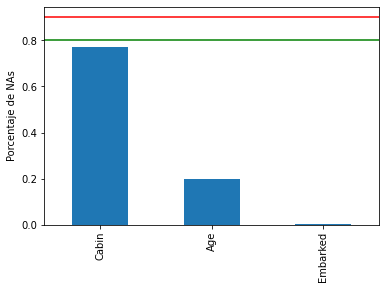

In [13]:
# graficando porcentajes de NA
data[var_with_na].isnull().mean().sort_values(ascending=False).plot.bar()
plt.ylabel("Porcentaje de NAs")
plt.axhline(y=0.9, color="r")
plt.axhline(y=0.8, color="g")

In [14]:
# variables categóricas con NA
cat_na = [var for var in cat_vars if var in var_with_na]
cat_na

['Cabin', 'Embarked']

In [15]:
# variables numéricas con NA
num_na = [var for var in num_vars if var in var_with_na]
num_na

['Age']

In [16]:
print("{} variables numéricas con NA".format(len(num_na)))
print("{} variables categóticas con NA".format(len(cat_na)))

1 variables numéricas con NA
2 variables categóticas con NA


##### * Verificación del impacto del NA contra el Target

In [17]:
def na_impact_over_target(df, Xvar, Yvar):
    df = data.copy()
    df[Xvar] = np.where(df[Xvar].isnull(), 1, 0)
    temp = df.groupby(Xvar)[Yvar].agg(['mean', 'std'])
    temp.plot(kind="barh", y="mean", xerr="std", legend=False, title=Yvar)
    plt.show()

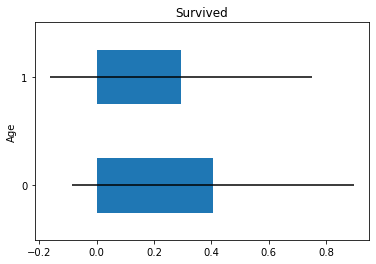

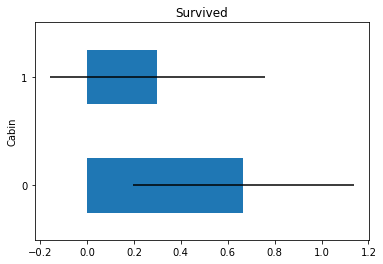

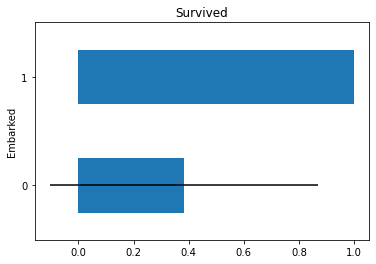

In [18]:
for var in var_with_na:
    na_impact_over_target(data, var, 'Survived')

### * Variables Discretas

In [19]:
discrete_vars = [var for var in num_vars if((len(data[var].unique()) < 20))]
discrete_vars

[]

In [20]:
print("Cantidad de Variables Discretas: ", len(discrete_vars))

Cantidad de Variables Discretas:  0


In [21]:
data[discrete_vars].head()

""
0
1
2
3
4


In [22]:
for var in discrete_vars:
    sns.catplot(x=var, y = 'Survived', data=data, kind="box", height=4)
    sns.stripplot(x=var, y='Survived', data=data, jitter=0.1, alpha=0.3,color='k')
    plt.show()

##### * Análisis de Variables Continuas

In [23]:
cont_vars = [var for var in num_vars if var not in discrete_vars]
#cont_vars

In [24]:
print("Variables Numericas Continuas: ", len(cont_vars))

Variables Numericas Continuas:  2


In [25]:
data[cont_vars].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


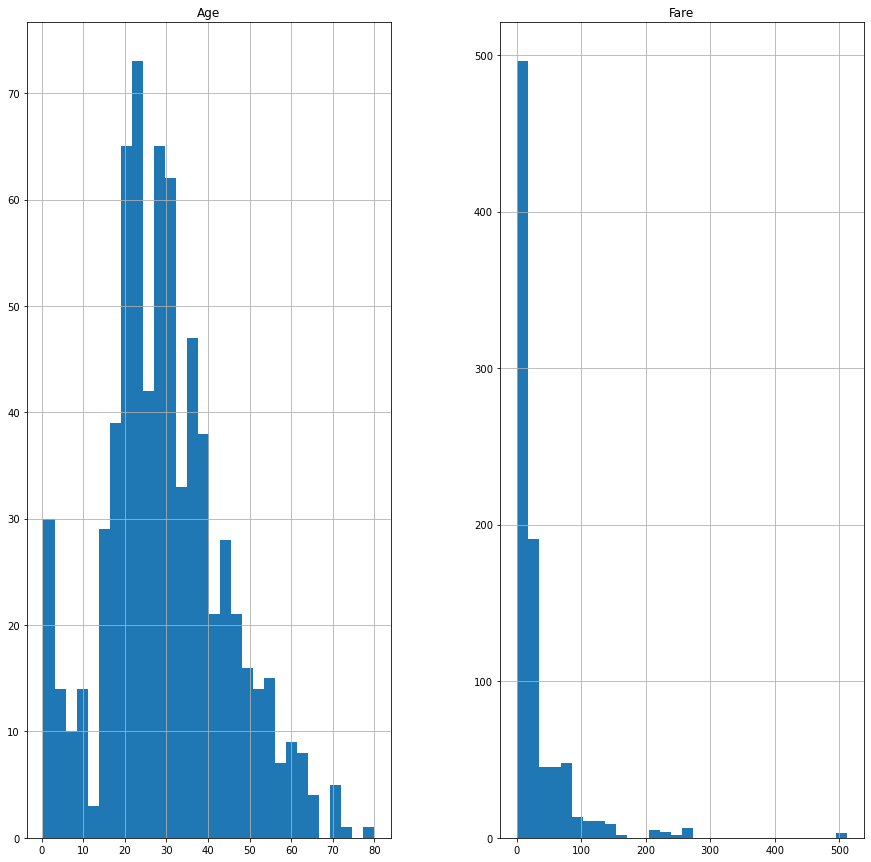

In [26]:
data[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

In [27]:
sesgadas = ['Fare']

In [28]:
cont_vars = [var for var in cont_vars if var not in sesgadas]
cont_vars

['Age']

##### * Transformación de Yeo-Johnson

In [30]:
temp_yj = data.copy()

In [31]:
for var in cont_vars:
    temp_yj[var], param = stats.yeojohnson(data[var])

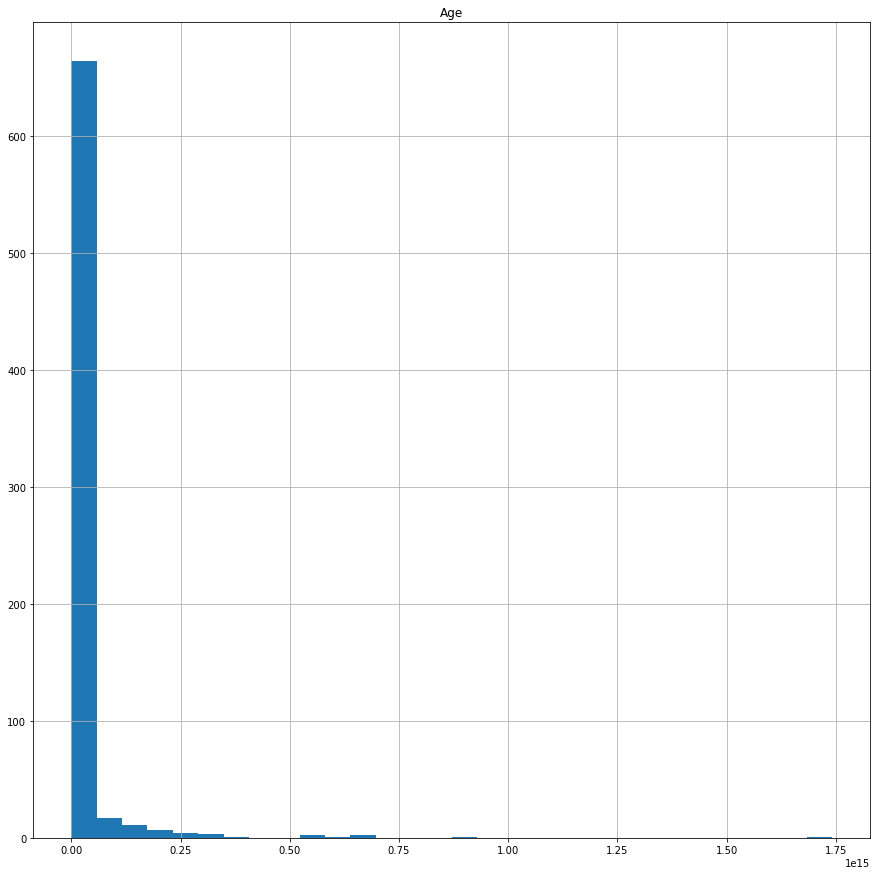

In [32]:
temp_yj[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

In [33]:
len(cont_vars)

1

In [34]:
cont_specials = ['Fare']

In [35]:
temp = data.copy()

for var in cont_vars:
    temp[var] = np.log(data[var] + 1)

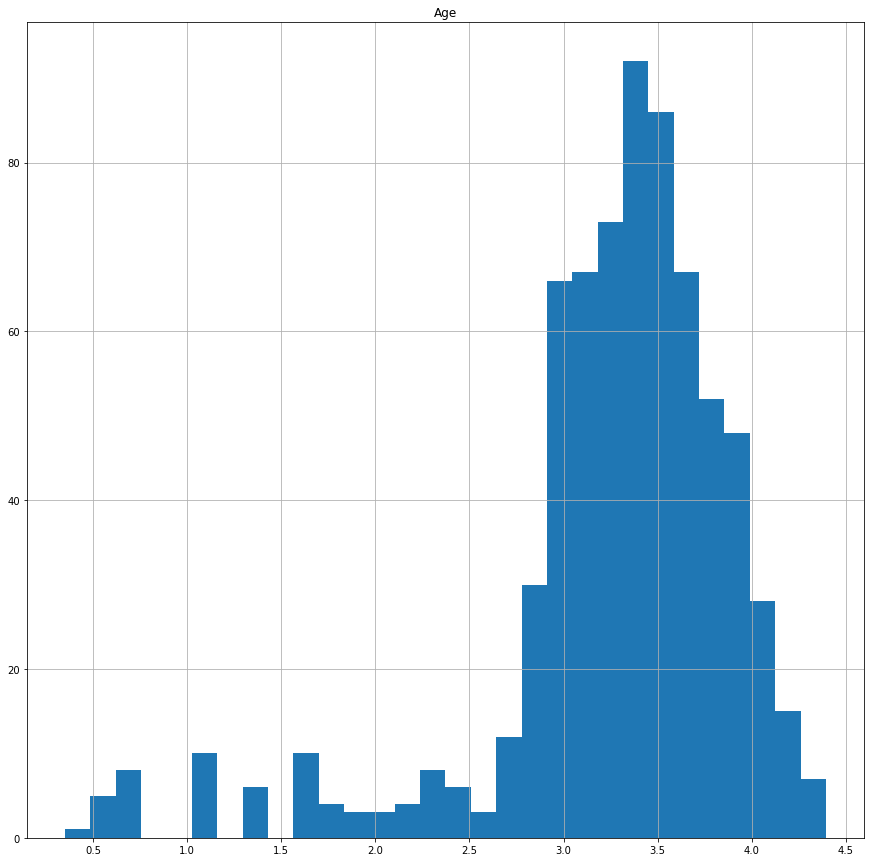

In [36]:
temp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


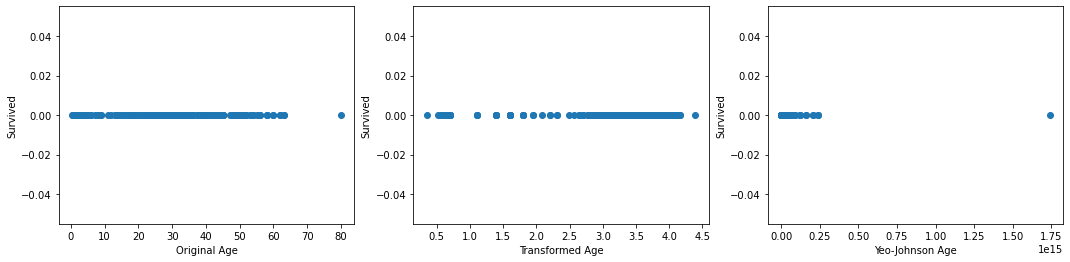

In [37]:
for var in cont_vars:
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 3, 1)
    plt.scatter(data[var], np.log(data['Survived']))
    plt.ylabel("Survived")
    plt.xlabel("Original " + var)
    
    plt.subplot(1, 3, 2)
    plt.scatter(temp[var], np.log(data['Survived']))
    plt.ylabel("Survived")
    plt.xlabel("Transformed " + var)
    
    plt.subplot(1, 3, 3)
    plt.scatter(temp_yj[var], np.log(data['Survived']))
    plt.ylabel("Survived")
    plt.xlabel("Yeo-Johnson " + var)

    plt.show()

##### * Variables con Sesgo

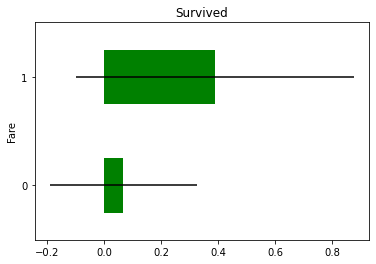

In [38]:
for var in sesgadas:
    temp = data.copy()
    
    temp[var] = np.where(data[var] == 0, 0, 1)
    
    temp = temp.groupby(var)['Survived'].agg(['mean', 'std'])
    
    temp.plot(kind='barh', y="mean", legend=False, xerr="std", title = "Survived", color="green")
    plt.show()

##### * Variables Categóricas

In [39]:
len(cat_vars)

8

In [40]:
data[cat_vars].head()

,Name,Sex,Ticket,Cabin,Embarked,Pclass,SibSp,Parch
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,3,1,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,1,1,0
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,3,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,1,1,0
4,"Allen, Mr. William Henry",male,373450,NaN,S,3,0,0


<AxesSubplot:>

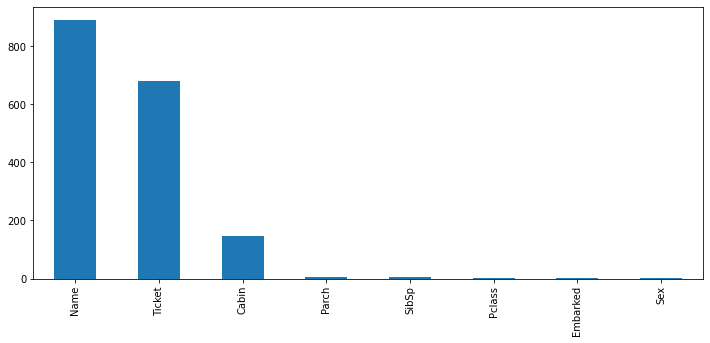

In [41]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [ ]:
np.unique(data['Name'])

In [62]:
np.unique(data['Sex'])

sex_mapping = {'male':1, 'female':0}

data['Sex'] = data['Sex'].map(sex_mapping)


In [ ]:
np.unique(data['Ticket'])

In [ ]:
np.unique(data['Cabin'])

In [ ]:
np.unique(data['Embarked'])

In [48]:
np.unique(data['Pclass'])

array([1, 2, 3], dtype=object)

In [49]:
np.unique(data['SibSp'])

array([0, 1, 2, 3, 4, 5, 8], dtype=object)

In [50]:
np.unique(data['Parch'])

array([0, 1, 2, 3, 4, 5, 6], dtype=object)

In [54]:
#qual_vars = qual_vars + finish_vars + ['BsmtExposure', 'GarageFinish', 'Fence']
qual_vars = "0"

for var in qual_vars:
    sns.catplot(x=var, y = 'Survived', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='Survived', data=data, jitter=0.1, alpha=0.3,color='k')
    plt.show()

In [55]:
otras = [var for var in cat_vars if var not in qual_vars]

In [56]:
len(otras)

8

##### * Rare Labels

In [53]:
def analyse_rare_labels(df, var, rare_perc):
    temp = df.groupby(var)['Survived'].count()/len(df)
    
    return temp[temp < rare_perc]

In [57]:
for var in otras:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Name
Abbing, Mr. Anthony                      0.001122
Abbott, Mr. Rossmore Edward              0.001122
Abbott, Mrs. Stanton (Rosa Hunt)         0.001122
Abelson, Mr. Samuel                      0.001122
Abelson, Mrs. Samuel (Hannah Wizosky)    0.001122
                                           ...   
de Mulder, Mr. Theodore                  0.001122
de Pelsmaeker, Mr. Alfons                0.001122
del Carlo, Mr. Sebastiano                0.001122
van Billiard, Mr. Austin Blyler          0.001122
van Melkebeke, Mr. Philemon              0.001122
Name: Survived, Length: 891, dtype: float64

Series([], Name: Survived, dtype: float64)

Ticket
110152         0.003367
110413         0.003367
110465         0.002245
110564         0.001122
110813         0.001122
                 ...   
W./C. 6608     0.004489
W./C. 6609     0.001122
W.E.P. 5734    0.001122
W/C 14208      0.001122
WE/P 5735      0.002245
Name: Survived, Length: 681, dtype: float64

Cabin
A10    0.001122
A14    0.001122
A1

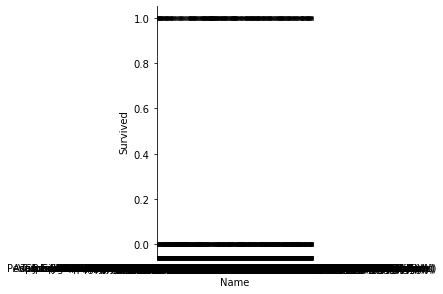

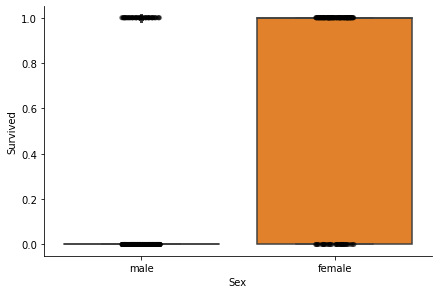

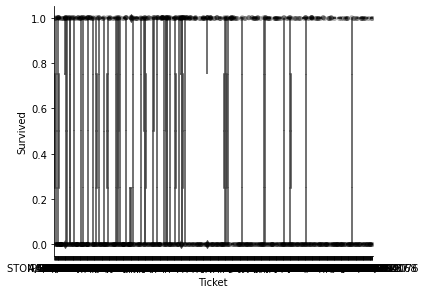

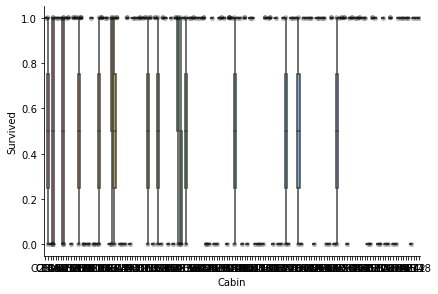

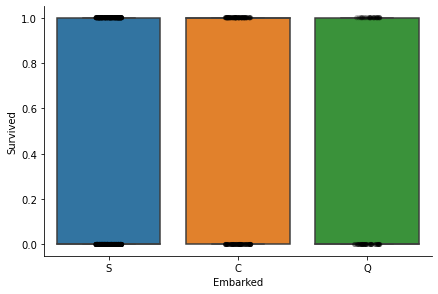

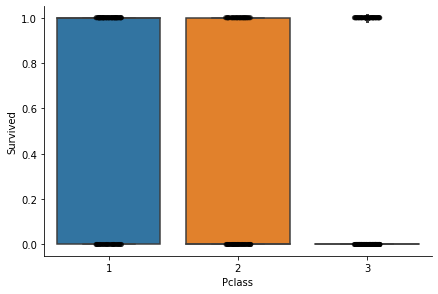

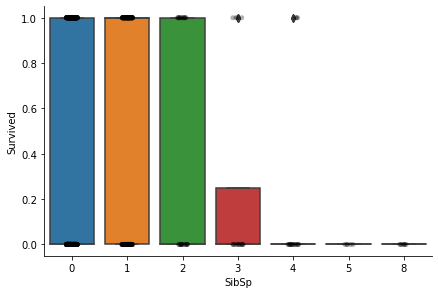

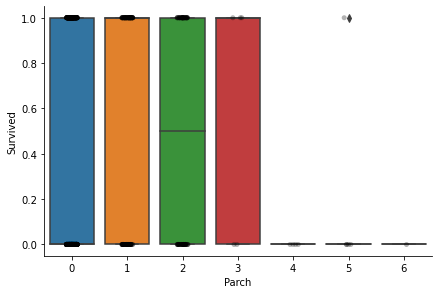

In [59]:
for var in otras:
    sns.catplot(x=var, y = 'Survived', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='Survived', data=data, jitter=0.1, alpha=0.3,color='k')
    plt.show()